# **Graham's Convex hull**
Solución propuesta por el profesor (explicada paso a paso)

Importamos las librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Vamos a crear algunas funciones que nos van a ayudar, como hallar la pendiente y el producto cruz
- El producto cruz es para saber si se hace un giro a la izquiera o a la derecha.

In [2]:
def slope(x1,y1,x2,y2):
  m = (y2-y1)/(x2-x1)
  return m

def CrossProduct(x0, y0, x1,y1,x2,y2):
  c = (x1-x0)*(y2-y0) - (x2-x0)*(y1-y0)
  return c


Vamos a definir puntos aleatorios.

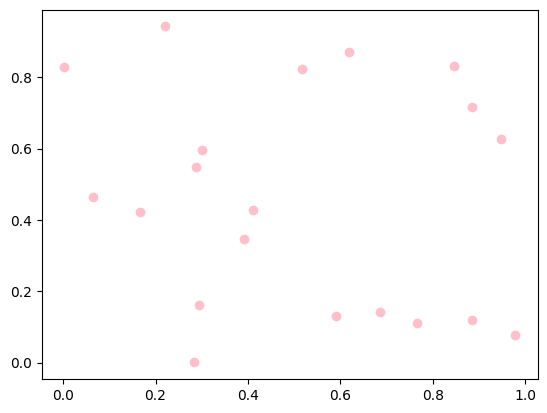

In [5]:
N = 20 #cantidad de numeros
np.random.seed(23)
x = np.round(np.random.rand(N),4)
y = np.round(np.random.rand(N),4)


plt.scatter(x,y, color = 'pink')
plt.show()

Metemos los puntos en una lista.

Va a ser conveniente que los puntos tengan etiqueta, esto para entender mejor el algoritmo.

Quedará de la forma: [Pn, coordenada x, coordenada y, pendiente]

Como aún no hemos calculado la pendiente, vamos a ponerla en 0 y más adelante le ponemos el valor.

In [7]:
points = []
for i in range(N):
  points.append(["P"+str(i), x[i], y[i], 0])
print(points)

[['P0', 0.5173, 0.8225, 0], ['P1', 0.947, 0.6262, 0], ['P2', 0.7655, 0.1105, 0], ['P3', 0.2824, 0.0005, 0], ['P4', 0.221, 0.9422, 0], ['P5', 0.6862, 0.1415, 0], ['P6', 0.1671, 0.4216, 0], ['P7', 0.3924, 0.3465, 0], ['P8', 0.6181, 0.8698, 0], ['P9', 0.4119, 0.4286, 0], ['P10', 0.0025, 0.8288, 0], ['P11', 0.884, 0.7179, 0], ['P12', 0.8849, 0.1192, 0], ['P13', 0.3004, 0.5964, 0], ['P14', 0.5896, 0.1298, 0], ['P15', 0.9784, 0.0775, 0], ['P16', 0.8451, 0.8312, 0], ['P17', 0.0651, 0.4644, 0], ['P18', 0.2947, 0.162, 0], ['P19', 0.2879, 0.548, 0]]


Ordenamos los puntos según su coordenada horizontal y designamos P0 como el punto mínimo y con el que empezaremos.

In [10]:
#Vamos a hacerlo con una función lambda

coor = lambda points: points[1]
points.sort(key = coor)
points

#designamos P0 como el punto minimo
pointmin = points[0]
pointmin

['P10', 0.0025, 0.8288, 0]

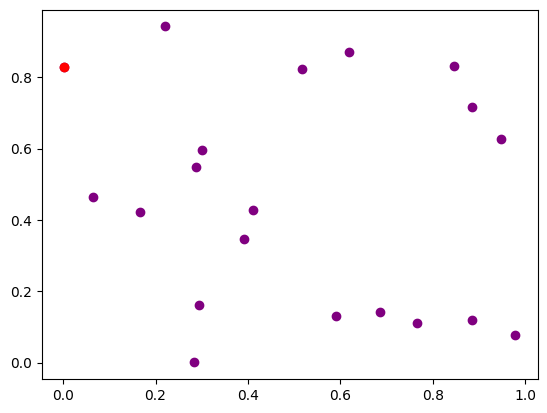

In [19]:
plt.scatter(x,y, color = 'purple')
plt.plot(pointmin[1], pointmin[2], 'ro')
plt.show()

Calculamos la pendiente con origen en Pmin, como Pmin está en points, vamos a darle un valor de -inf a pmin

In [ ]:
points[0][3] = -np.inf

#calculamos las pendientes
for i in range(1, N):
  points[i][3] = slope(points[0][1], points[0][2], points[i][1], points[i][2]) #Aqui calculamos cada pendiente y la metemos en el arreglo

#ordenamos el arreglo segun la pendiente con una funcion lambda
slope = lambda points: points[3]
points.sort(key = slope)
points


Vamos a etiquetar cada punto (para que sea más sencillo de entender)

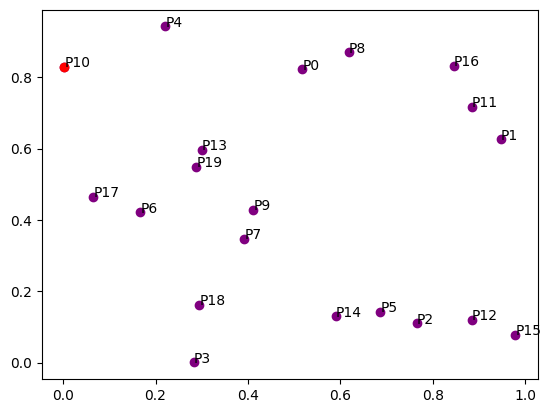

In [20]:
plt.scatter(x,y, color = 'purple')
plt.plot(pointmin[1], pointmin[2], 'ro')
for i in range(N):
  plt.annotate(points[i][0], xy = (points[i][1], points[i][2]))
plt.show()

Teniendo ya la lista ordenada, podemos hacer una funcion para graficar el poligono convexo

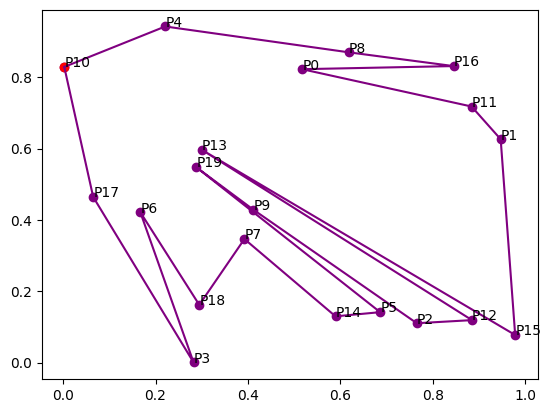

In [25]:
Pol = []
for n in range(N):
  Pol.append(points[n])
Pol.append(points[0]) #volvemos a añadir el punto minimo para que se cierre el poligono

def hull():
  xcoor = [] #guardamos todas las coordenadas en x
  ycoor = [] #guardamos todas las coordenadas en y
  for i in range(len(Pol)):
    xcoor.append(Pol[i][1])
    ycoor.append(Pol[i][2])
  plt.scatter(x,y, color = 'purple')
  plt.plot(pointmin[1], pointmin[2], 'ro')
  for i in range(N):
    plt.annotate(points[i][0], xy = (points[i][1], points[i][2]))
  plt.plot(xcoor, ycoor, color = 'purple')
  plt.show()


hull()

Vamos ahora si a hacer la envolvente convexa:

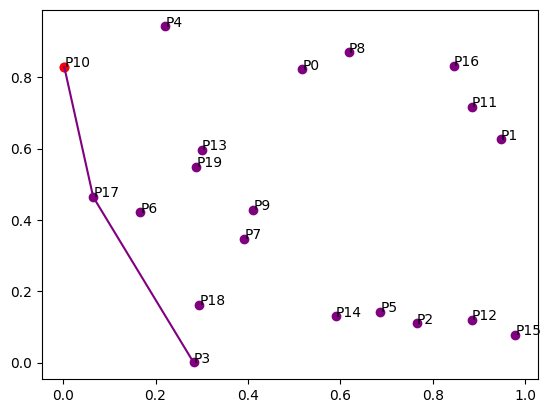

P17 0.05014398


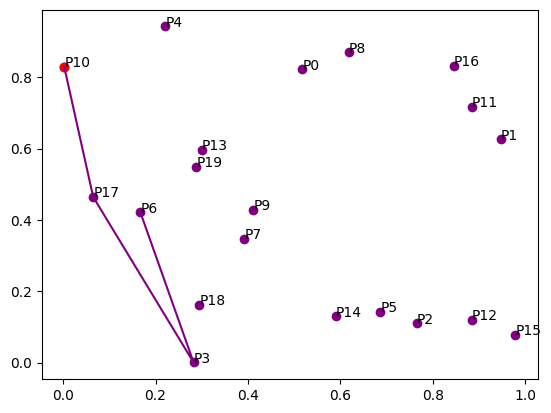

P3 0.03801735999999999


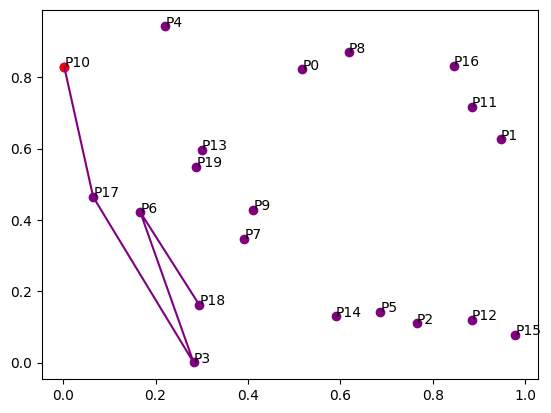

P6 -0.023800480000000013


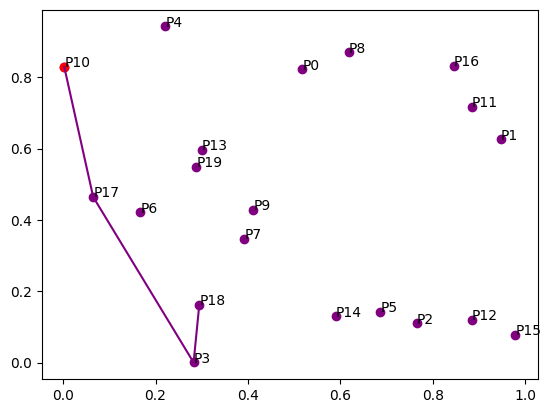

P3 0.04079992000000002


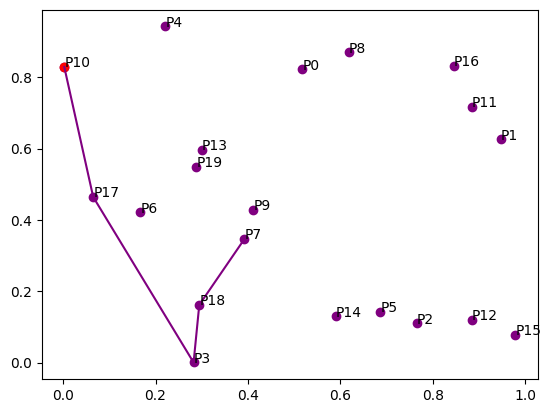

P18 -0.013509199999999996


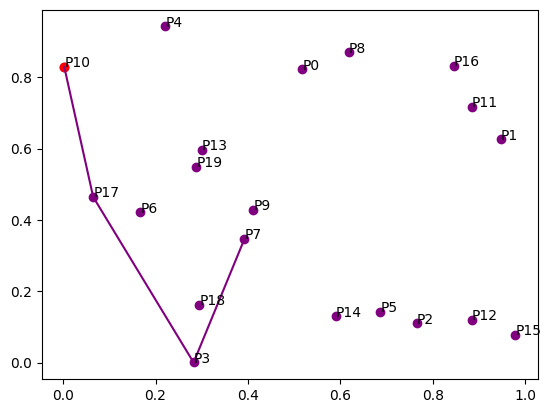

P3 0.1262148


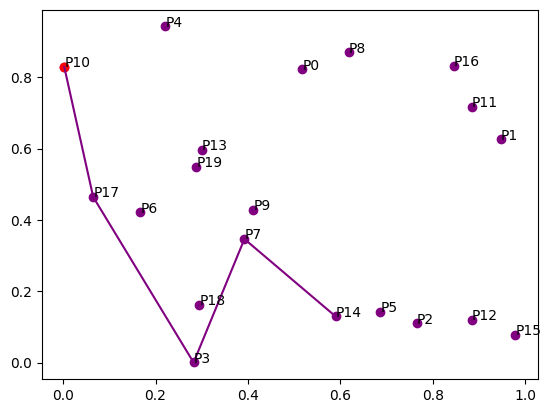

P7 -0.0920682


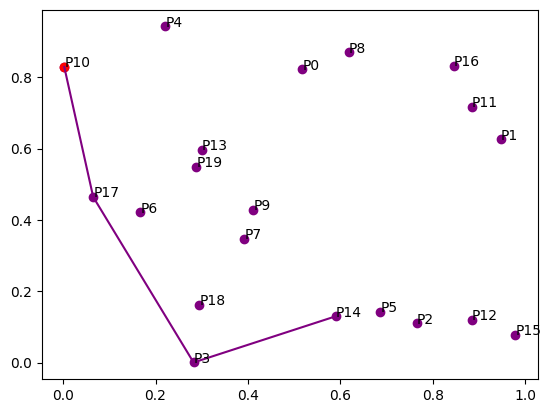

P3 0.17060696999999997


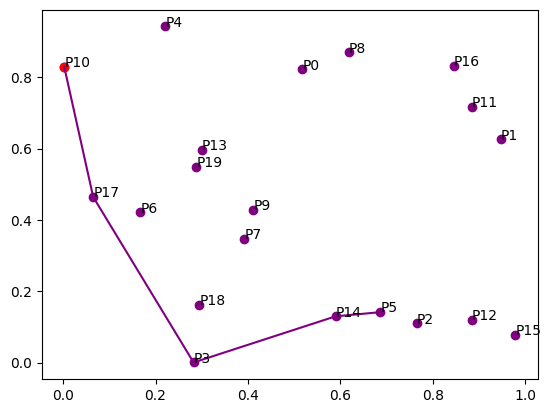

P14 -0.00889614000000001


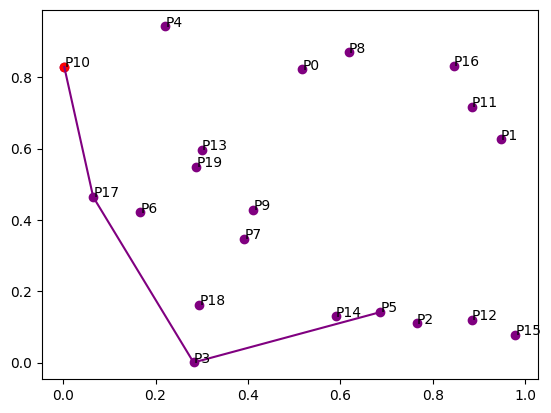

P3 0.21796211999999998


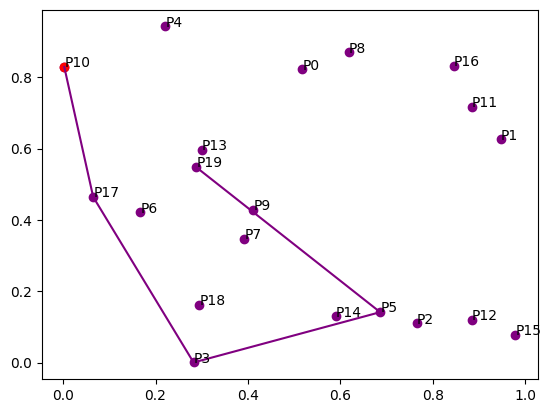

P5 0.22030500000000006


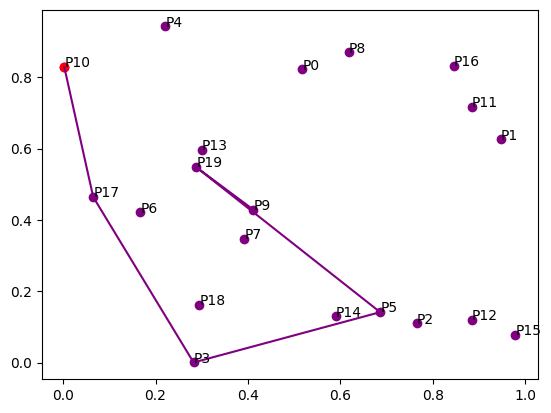

P19 -0.002848979999999973


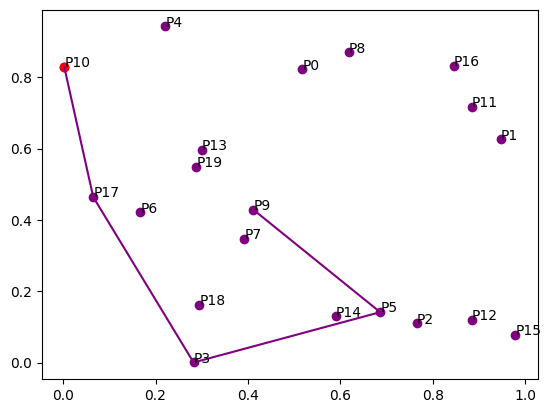

P5 0.15460728


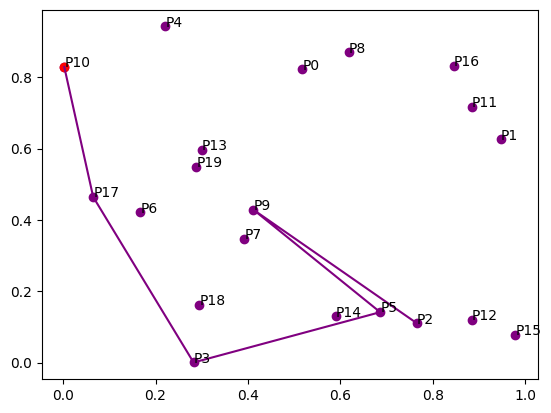

P9 -0.014263729999999983


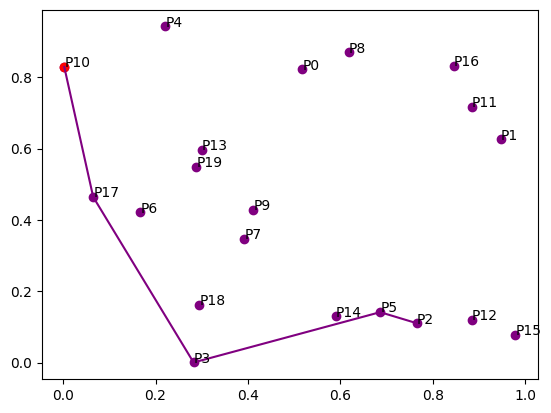

P5 -0.02369909999999998


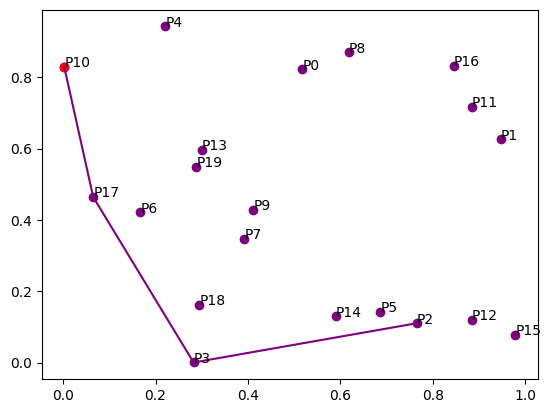

P3 0.24801308999999994


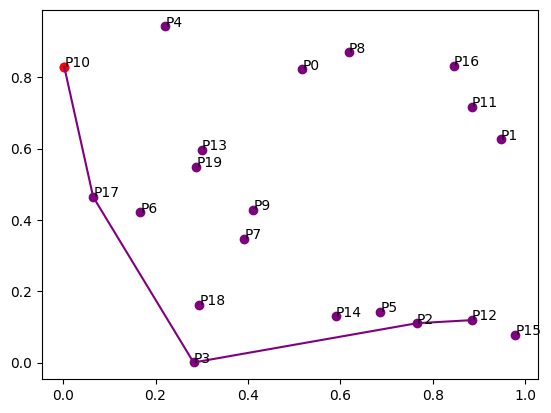

P2 -0.008931030000000006


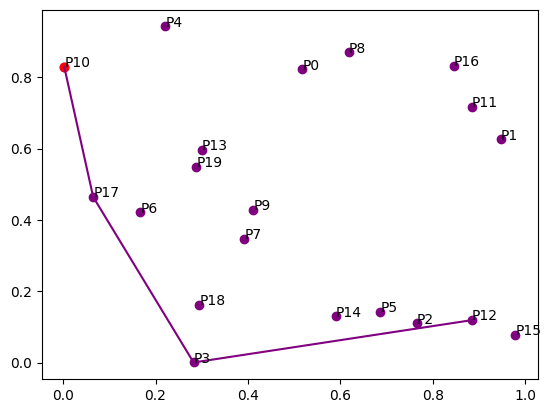

P3 0.30529325999999996


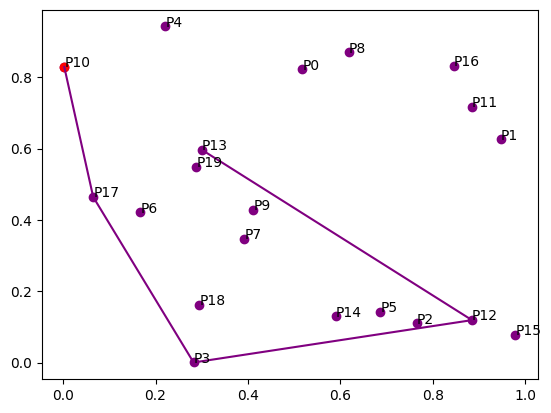

P12 0.3568931500000001


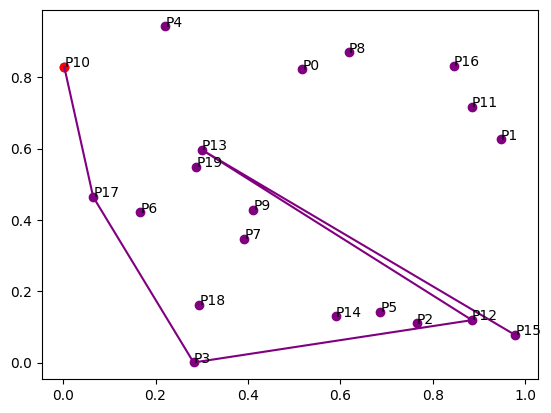

P13 -0.020244550000000017


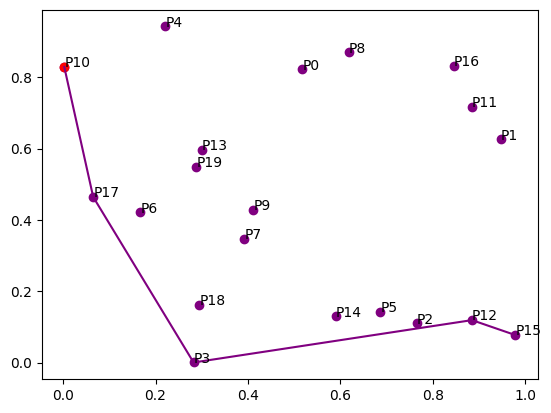

P12 -0.03622270000000001


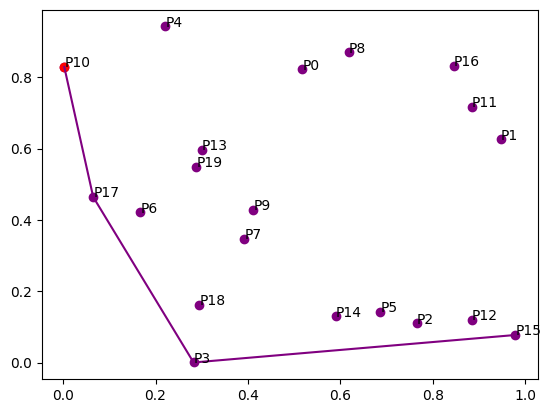

P3 0.3396065


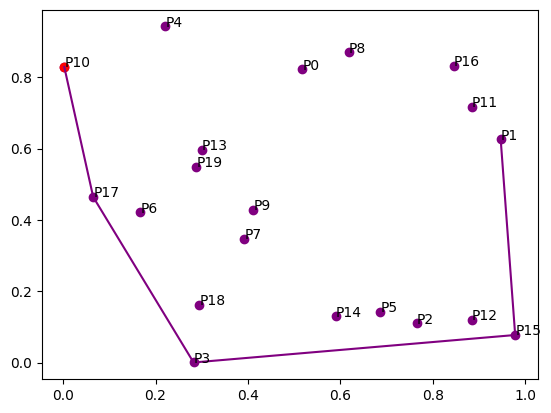

P15 0.38431300000000007


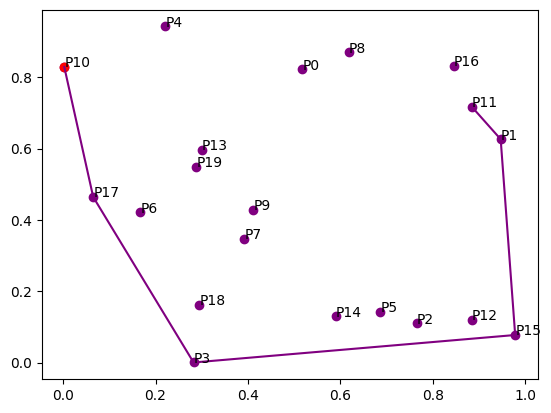

P1 0.031688719999999955


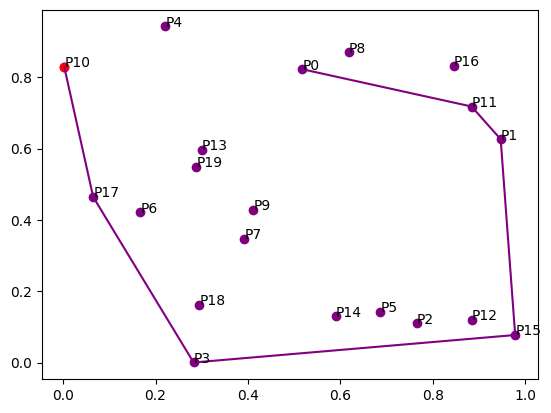

P11 0.027036590000000006


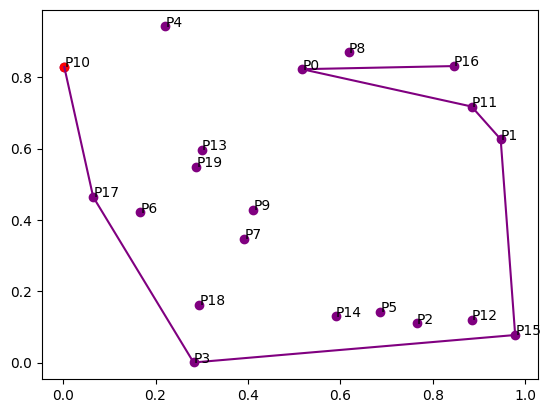

P0 -0.03747817000000002


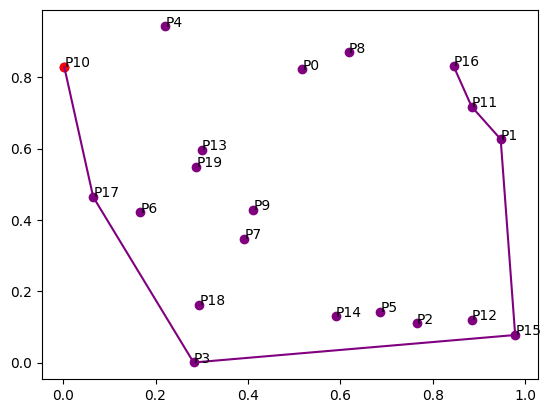

P11 -0.003570769999999992


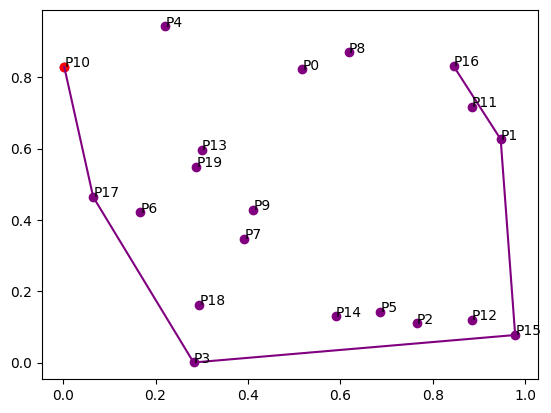

P1 0.04947552999999997


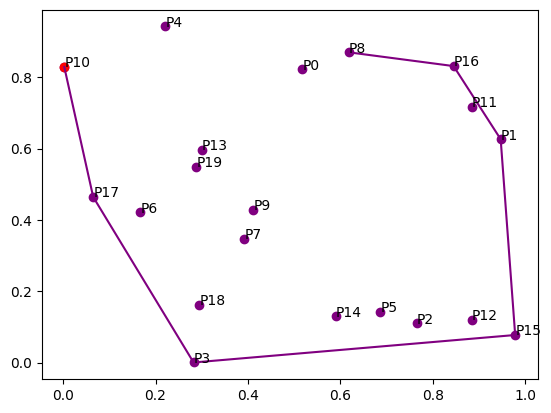

P16 0.04260166000000001


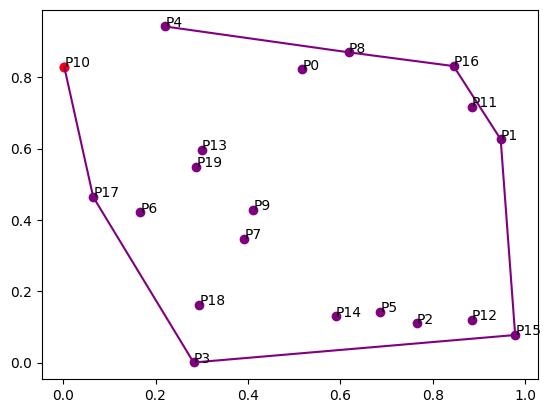

P8 -0.0011067400000000158


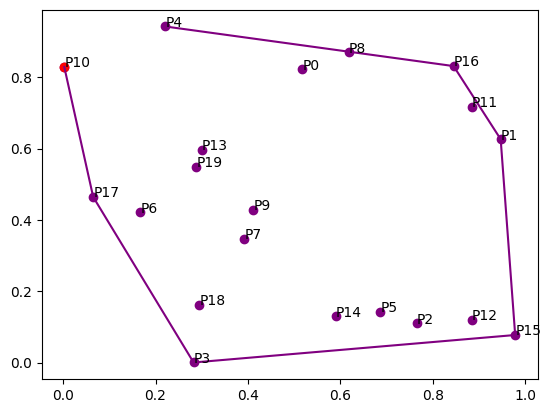

P16 0.11662960000000004


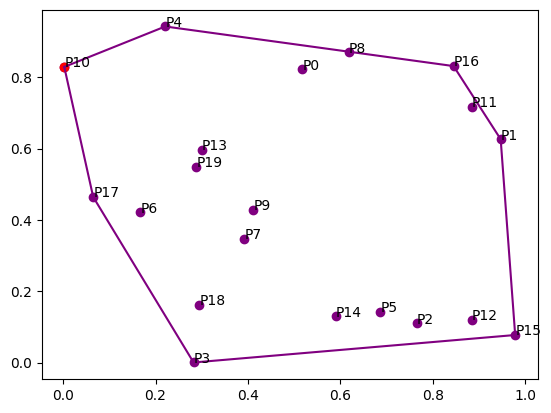

In [26]:
pc = points.copy()
pc.append(pointmin) #volvemos a meter al final el punto minimo :)
Pol = [pc[0], pc[1], pc[2]] #metemos al polígono los 3 primeros puntos

for i in range(3):
  pc.pop(0)

#vamos a ir eliminando los elementos de pc
while len(pc) > 0:
  hull()
  d = CrossProduct(Pol[-3][1], Pol[-3][2], Pol[-2][1], Pol[-2][2], Pol[-1][1], Pol[-1][2])
  print(Pol[-2][0], d)
  while d <= 0:
    Pol.pop(len(Pol)-2)
    hull()
    d = CrossProduct(Pol[-3][1], Pol[-3][2], Pol[-2][1], Pol[-2][2], Pol[-1][1], Pol[-1][2])
    print(Pol[-2][0], d)
  else:
    if len(pc) > 0:
      Pol.append(pc[0])
      pc.pop(0)

hull()


Finalmente, nuestra envolvente convexa es

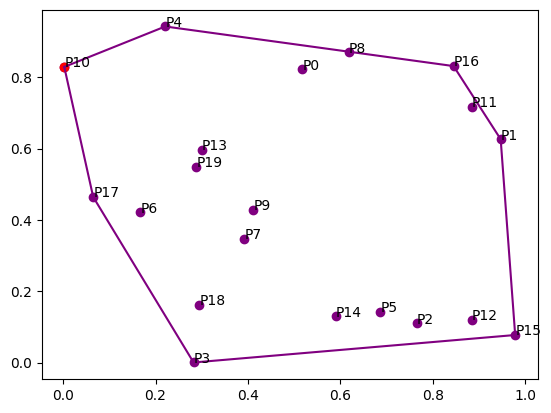

In [27]:
hull()